# Filter predicted ligands

There are many techniques to generate a ranked list of molecules having some desirable property, such as activity at a protein target of interest. The problem here is that the number of predicted ligands could easily exceed the synthesis and assay budget. Further issues are that some proportion of the ligands:

- are difficult to synthesize (such as some natural products)
- have toxic off-target activity
- closely resemble existing ligands (meaning they fall under an existing patent and are not good drug development candidates)
- are chemically unstable
- have 'bad' motifs like carboxylic acids that will be quickly metabolised

In short, ranked predictions should be accompanied by some method of filtering. A large-scale example of this is the Ultra-large library docking for discovering new chemotypes. It usually involves some visual inspection by a medicinal chemist or pharmacologist as well as automated filtering. This notebook will perform the filtration step for you. 

# Load a ranked list:


In [1]:
import pandas as pd
csv_filename = 'https://raw.githubusercontent.com/ljmartin/filter_my_ligands/master/minimal.csv'
df = pd.read_csv(csv_filename)

print(len(df))
df.head()


9


,rank,smiles,name
0,1,CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,diazepam
1,2,CC(=O)OC1=CC=CC=C1C(=O)O,aspirin
2,9,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,cannabidiol
3,4,O=C(O[C@@H]1[C@H]3C(=C/[C@H](C)C1)\C=C/[C@@H](...,lovastatin
4,5,CN(C)C(=N)N=C(N)N,metformin


# Select the desired columns

In [2]:
# Select the column containing the smiles codes:
smiles_column = 'smiles'

# Select the column containing the ranks, where 1 is highest.
rank_column = 'rank'



In [3]:
from AutomatedFiltration import AutomatedFiltering
auto_f = AutomatedFiltering(df, smiles_column, rank_column)

In [4]:
auto_f.make_distance_matrix(kneighbors=3)

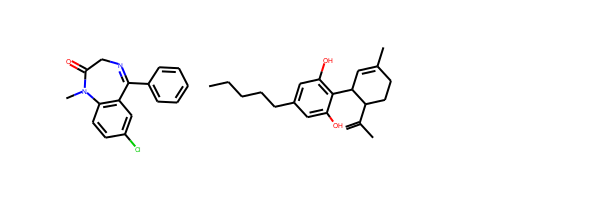

In [9]:
auto_f.filter(2)

In [3]:
paris = Paris()
dendrogram = paris.fit_transform(sparse.csr_matrix(auto_f.dmat))

cut_straight(dendrogram, 3)

NameError: name 'Paris' is not defined

In [4]:
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [16]:
import glob
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive

csvs = sorted(glob.glob('*csv'))

def plot(x=csvs[0]):
    dfs = pd.read_csv(x, sep=',')
    dfs.plot(figsize=(12, 8))

w = widgets.Select(options=csvs)
#interactive(plot, x=w)

In [13]:
csvs

[]

In [5]:
df = pd.read_csv('minimal.csv')
mols = [Chem.MolFromSmiles(smi) for smi in df['smiles']]

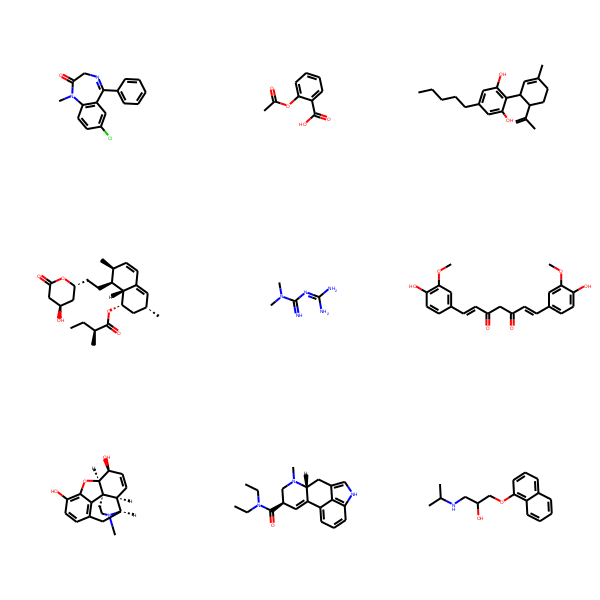

In [7]:
Draw.MolsToGridImage(mols)